In [101]:
import warnings 
warnings.filterwarnings('ignore')

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Reading The Data

In [103]:
cars_data = pd.read_csv('C:\\Users\\hp\\Downloads\\CarPrice_Assignment.csv')
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [104]:
#shape of data
cars_data.shape

(205, 26)

In [105]:
#see the information about the data
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [106]:
#describe the data
cars_data.describe(percentiles = [0.10,0.25,0.50,0.75,0.90,0.99])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
10%,21.400000,-1.000000,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,8.000000,68.000000,4500.000000,17.000000,23.000000,6657.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
90%,184.600000,3.000000,107.900000,188.800000,68.640000,56.620000,3230.000000,181.000000,3.672000,3.540000,10.940000,160.000000,5780.000000,31.600000,38.000000,22563.000000
99%,202.960000,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000


# Data Cleaning

In [107]:
cars_data.duplicated(subset = ['car_ID']).sum()

0

No duplicate records

In [108]:
cars_data = cars_data.drop(['car_ID'], axis=1)

In [109]:
cars_data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [110]:
#symboling column - Its assigned as insurance risk rating, 
#A value of +3 indicates that the auto is risky. -3 that it is probably pretty safe.
cars_data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

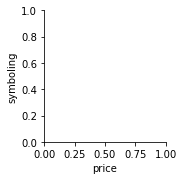

In [111]:
sns.pairplot(y_vars = 'symboling', x_vars = 'price', data = cars_data)

In [112]:
#Column CarName
cars_data['CarName'].value_counts()

peugeot 504                 6
toyota corona               6
toyota corolla              6
subaru dl                   4
toyota mark ii              3
                           ..
honda civic 1300            1
subaru trezia               1
vw dasher                   1
plymouth fury gran sedan    1
nissan fuga                 1
Name: CarName, Length: 147, dtype: int64

We see that CarName is comprised of two parts- the first word is the name of 'car company' and the second is the 'car model'

In [113]:
cars_data['car_company'] = cars_data['CarName'].apply(lambda x:x.split(' ')[0])

In [114]:
#rechecking
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [115]:
#deleting the original column 
cars_data = cars_data.drop(['CarName'], axis = 1)

In [116]:
cars_data['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
vw              2
maxda           2
vokswagen       1
toyouta         1
mercury         1
Nissan          1
porcshce        1
Name: car_company, dtype: int64

We see some spelling mistakes in the data

In [117]:
#Replacing the wrong car company name by the right one
cars_data['car_company'].replace('toyouta', 'toyota',inplace=True)
cars_data['car_company'].replace('Nissan', 'nissan',inplace=True)
cars_data['car_company'].replace('maxda', 'mazda',inplace=True)
cars_data['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
cars_data['car_company'].replace('vw', 'volkswagen',inplace=True)
cars_data['car_company'].replace('porcshce', 'porsche',inplace=True)


In [118]:
#rechecking the data
cars_data['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [119]:
#fueltype - Car fuel type i.e. gas or diesel
cars_data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [120]:
#aspiration - Aspiration used in a car
cars_data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [121]:
#doornumber - Number of doors in a car
cars_data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

As there are numbers, let us convert these numbers into numeric form.

In [122]:
def number_(x):
    return x.map({'four':4, 'two':2})
cars_data['doornumber'] = cars_data[['doornumber']].apply(number_)

In [123]:
#rechecking
cars_data['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [124]:
#carbody - body of car
cars_data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [125]:
#drivewheel - type of drive wheel
cars_data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [126]:
#enginelocation - Location of car engine
cars_data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [127]:
#wheelbase - Wheel base of car
cars_data['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
98.4     7
Name: wheelbase, dtype: int64

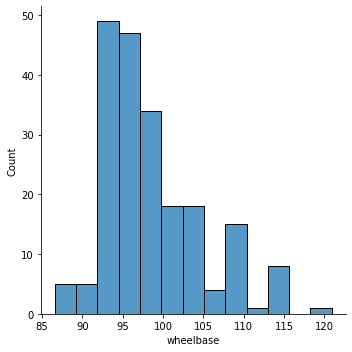

In [128]:
sns.displot(cars_data['wheelbase'])
plt.show()

In [129]:
#carlength - Length of car
cars_data['carlength'].value_counts().head()

157.3    15
188.8    11
166.3     7
171.7     7
186.7     7
Name: carlength, dtype: int64

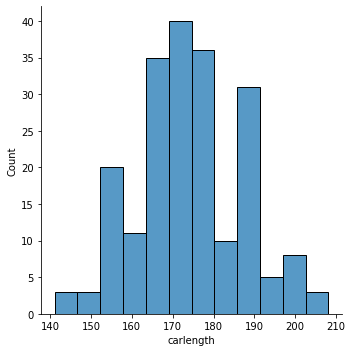

In [130]:
sns.displot(cars_data['carlength'])
plt.show()

In [131]:
#enginetype - Type of engine
cars_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [132]:
#cylindernumber - cylinder placed in the car
cars_data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

As there are numbers, let us convert these numbers into numeric form

In [133]:
def convert_number(x):
    return x.map({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12})
cars_data['cylindernumber'] = cars_data[['cylindernumber']].apply(convert_number)

In [134]:
#re-checking
cars_data['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

In [135]:
#fuelsystem - Fuel system of car
cars_data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

We have almost looked into most of the column individually. Now let us explore data visualization to look for any hidden patterns

# Data Visualization

In [136]:
cars_numeric = cars_data.select_dtypes(include =['int64','float64'])
cars_numeric.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 1800x1800 with 0 Axes>

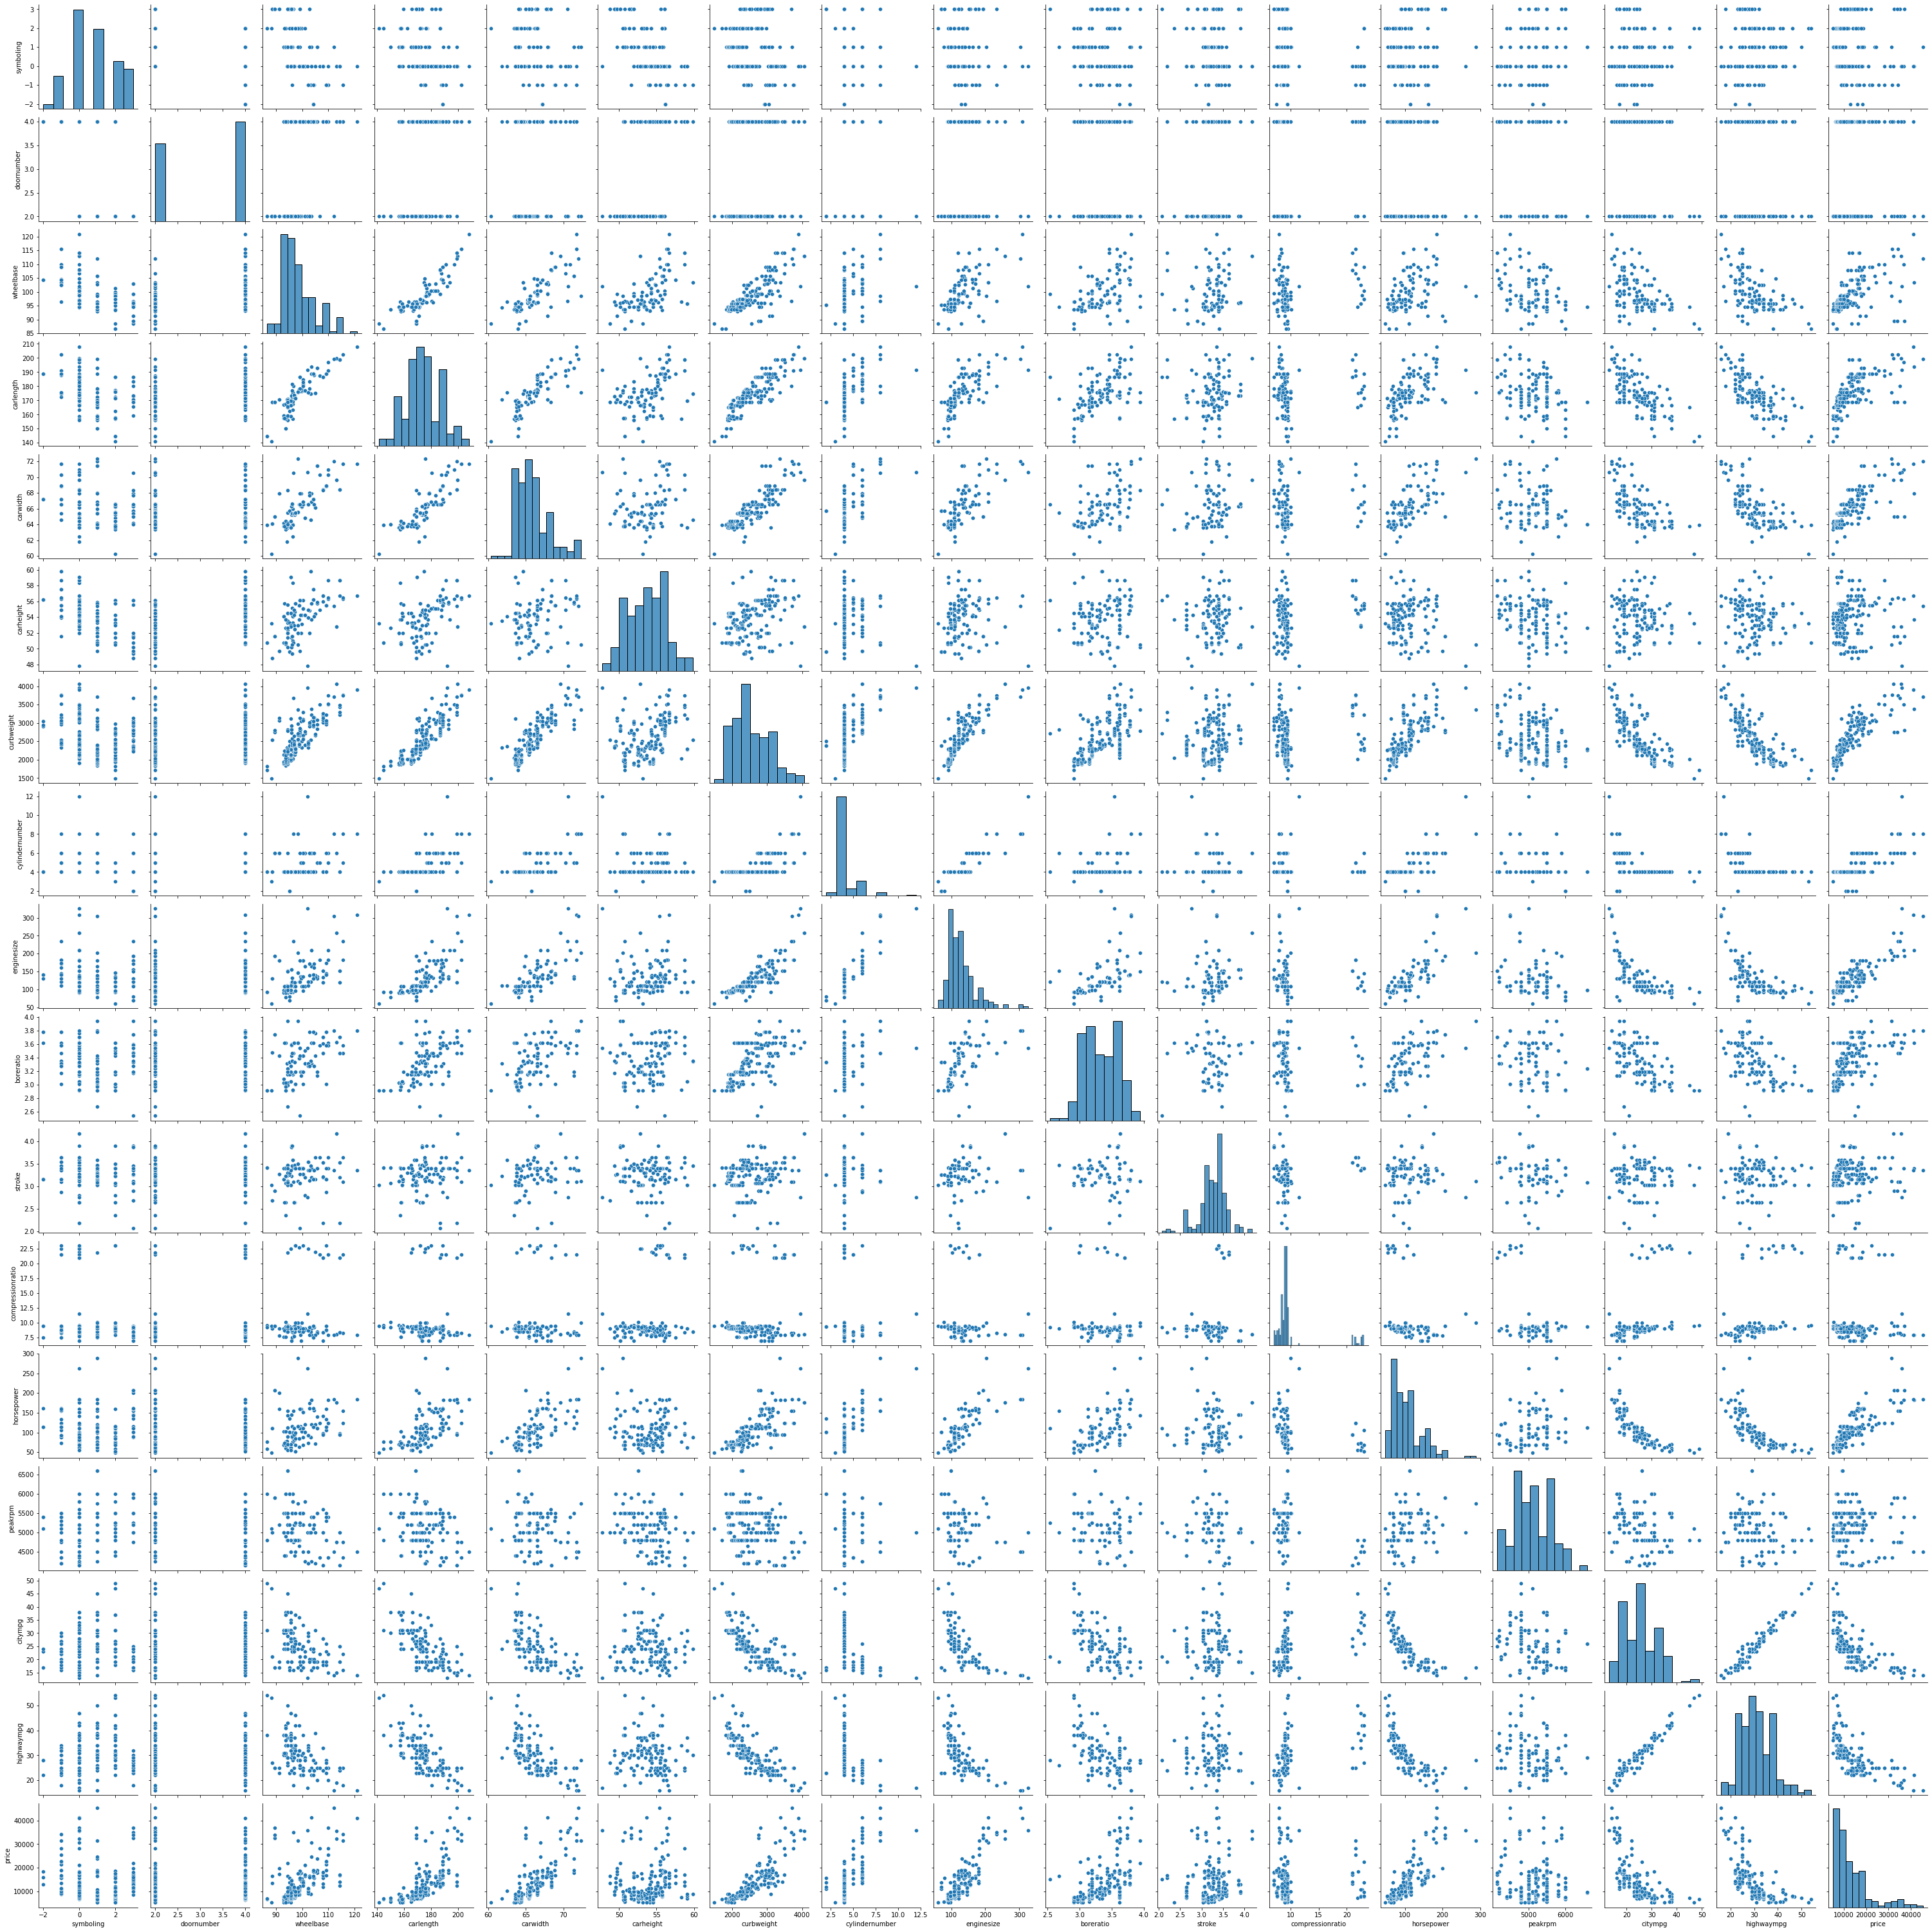

In [137]:
plt.figure(figsize = (25,25))
sns.pairplot(cars_numeric)
plt.show()

As there are lot of columns- we cannot make out really much from above graph.
Let us check the corelation.

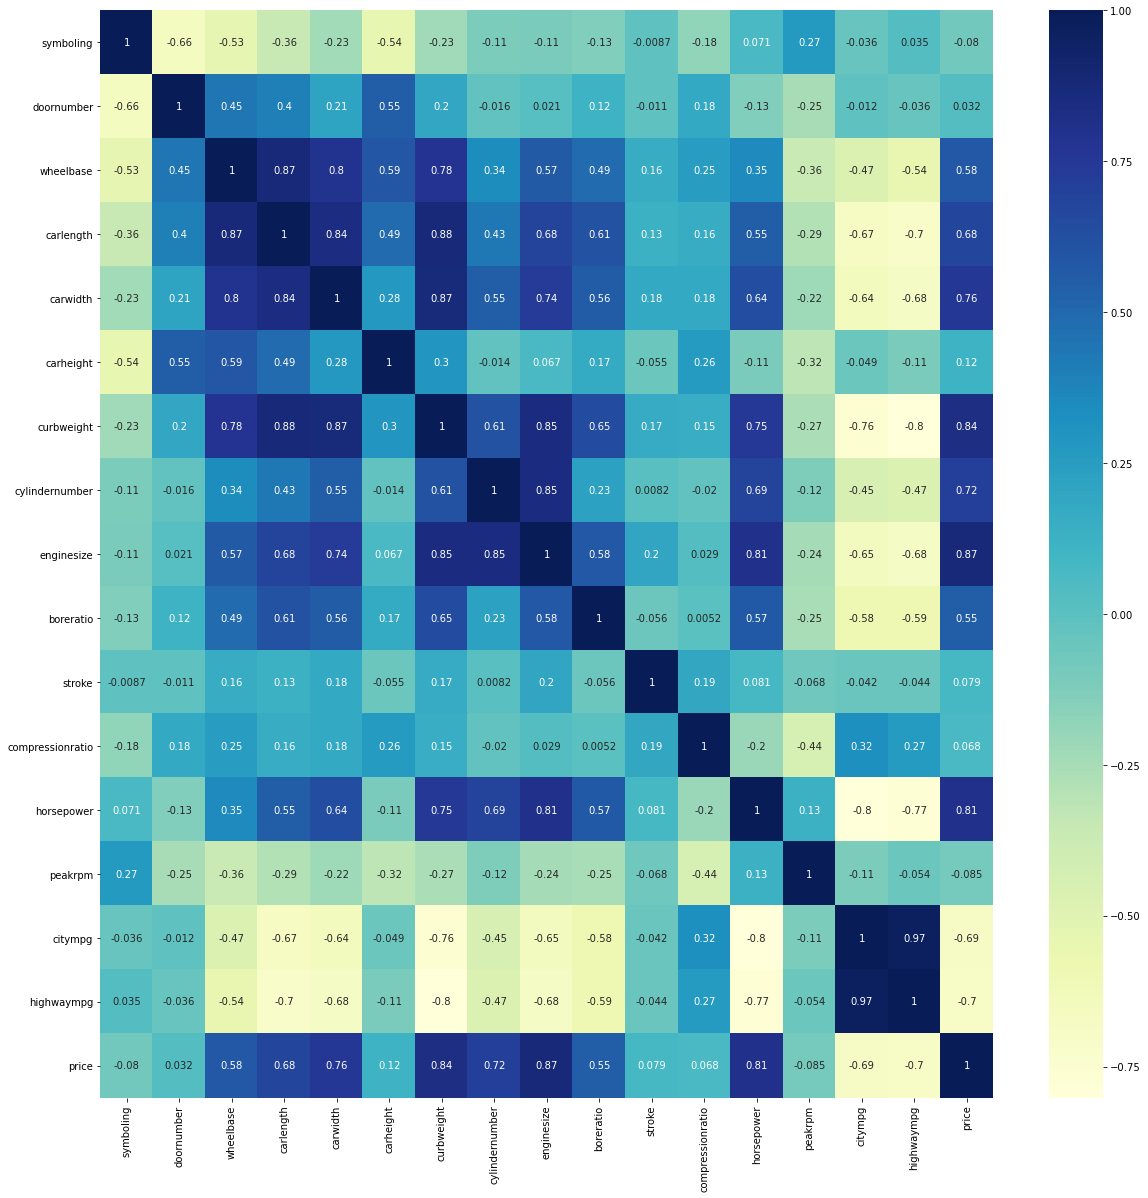

In [138]:
plt.figure(figsize = (20,20))
sns.heatmap(cars_data.corr(), annot = True , cmap = 'YlGnBu')
plt.show()

#### Price is highly (positively) corelated with wheelbase, carlength, carwidth, curbweigth, enginesize, horsepower.
#### Price is negatively corelated to symboling, citympg and highwaympg.
#### This suggest that cars having high mileage may  fall in the 'economy' cars category, and are priced lower.
#### There are many independent variables which are highly corelated: wheelbase, carlength, curbweight, enginesize etc. all are positively corelated.

In [139]:
categorical_cols = cars_data.select_dtypes(include = ['object'])
categorical_cols.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

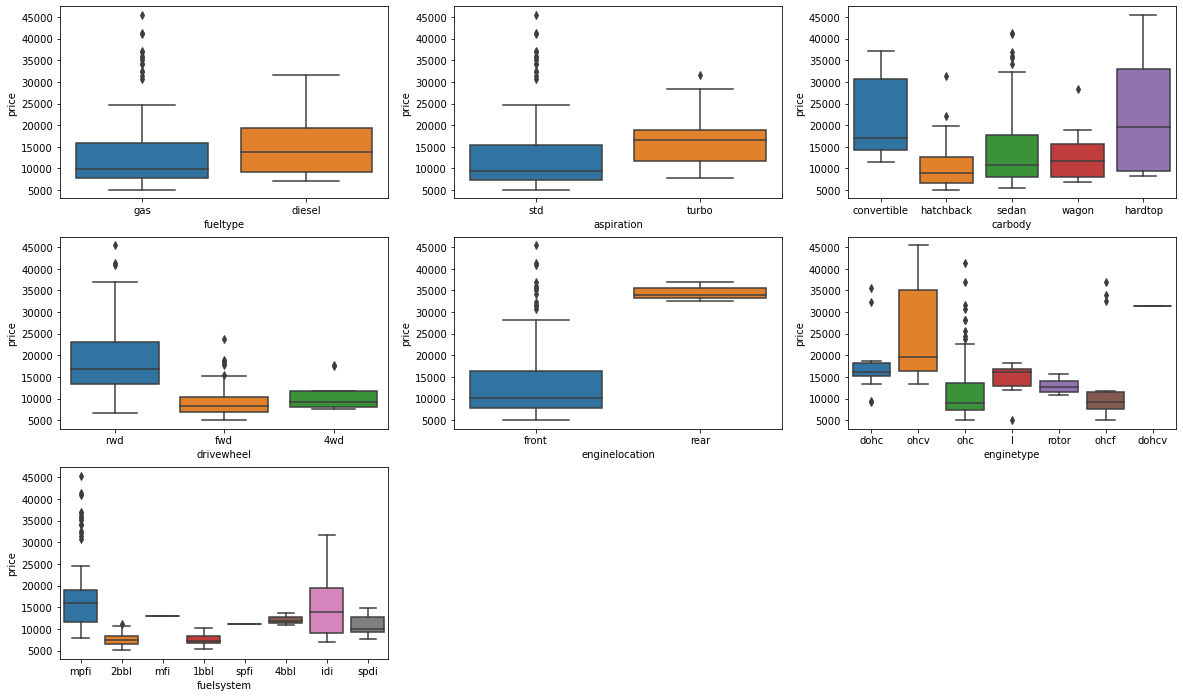

In [140]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = cars_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_data)

<AxesSubplot:xlabel='car_company', ylabel='price'>

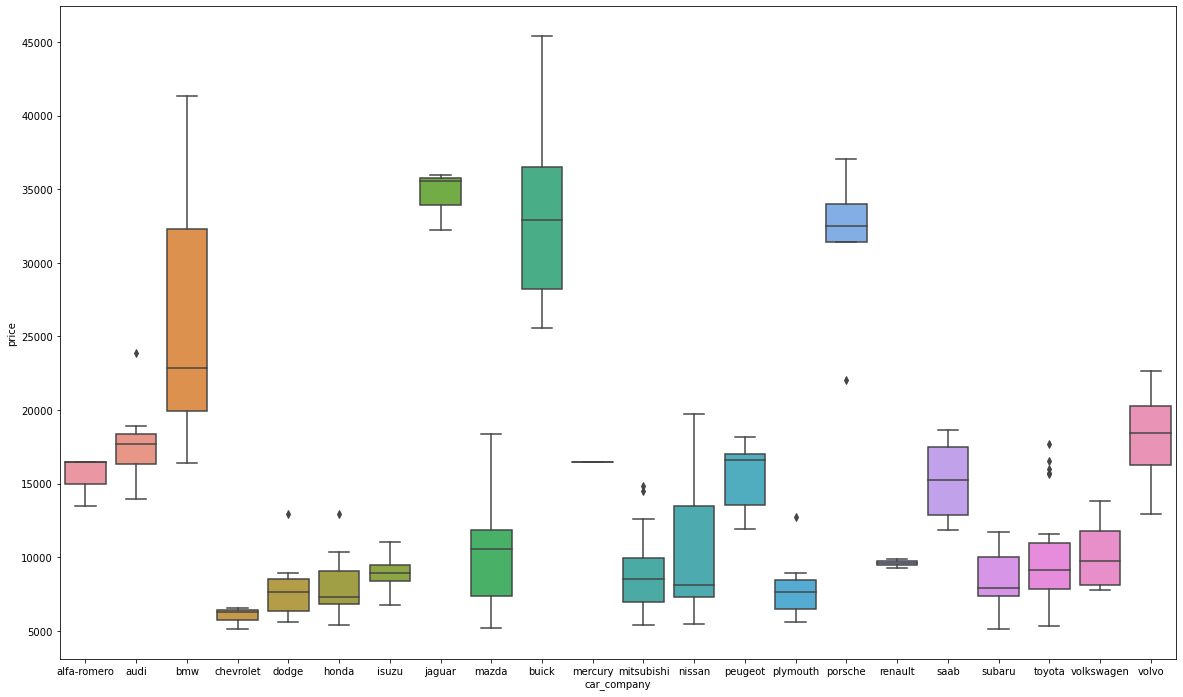

In [141]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'car_company', y = 'price', data = cars_data)

#### 1. From the boxplot it is clear that the brands with the most expensive vehicles in the data set belong to Bmw, Buick, Jaguar and porsche.
#### 2. Whereas the lower priced cars belong to chevorlet.
#### 3. The median price of gas vehicles is lower than that of Diesel Vehicles.
#### 4. 75th percentile of aspirated vehicles have a price lower than the median price of turbo aspirated vehicles.
#### 5. Two and four Door vehicles are almost equally priced. There are however some outliers in the price of two-door vehicles. 
#### 6. Hatchback vehicles have the lowest median price of vehicles in the data set whereas hardtop vehicles have the heighest median price.
#### 7. The price of vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines.
#### 8. Almost all vehicles in the dataset have engines placed in the front of the virtual. However, the price of vehicles with rear placed of vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines.
#### 9. The median cost of eight cylinder vehicles is higher than other cylinder categories.
#### 10. It is clear that vehicles Multi-port Fuel In jection [MPFI] fuelstyles have the highest median price. There are also some outliers on the higher price side having MPFI systems.
#### 11. Vehicles with OHCV engine type falls under higher price range.

# Data Preparation

In [142]:
#creating dummies
cars_dummies = pd.get_dummies(categorical_cols, drop_first = True)
cars_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
car_df = pd.concat([cars_data, cars_dummies], axis = 1)

In [144]:
car_df = car_df.drop(['fueltype','aspiration','carbody','drivewheel','enginelocation', 'enginetype', 'fuelsystem', 'car_company'], axis = 1)

In [145]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   doornumber              205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   carlength               205 non-null    float64
 4   carwidth                205 non-null    float64
 5   carheight               205 non-null    float64
 6   curbweight              205 non-null    int64  
 7   cylindernumber          205 non-null    int64  
 8   enginesize              205 non-null    int64  
 9   boreratio               205 non-null    float64
 10  stroke                  205 non-null    float64
 11  compressionratio        205 non-null    float64
 12  horsepower              205 non-null    int64  
 13  peakrpm                 205 non-null    int64  
 14  citympg                 205 non-null    in

# Splitting the data into test and train

In [146]:
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [147]:
df_train.shape

(143, 60)

In [148]:
df_test.shape

(62, 60)

# Rescaling the data

In [149]:
cars_numeric.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [150]:
col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price']

In [151]:
scaler = StandardScaler()

In [152]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [153]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.473477e-17,9.006005e-17,1.538785e-15,2.003060e-16,-4.093074e-15,5.450186e-16,-1.894367e-16,-3.726623e-16,-4.308908e-17,-1.059758e-15,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.347020e+00,-1.126872e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-2.084351e+00,-1.566427e+00,-2.412359e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.689008e-01,-1.126872e+00,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-3.514313e-01,-6.847340e-01,-9.320600e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.701590e-01,8.874120e-01,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,-2.478347e-01,-3.514313e-01,-3.663447e-01,9.948427e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.701590e-01,8.874120e-01,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,7.203955e-01,-3.514313e-01,3.928914e-01,8.942829e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.848278e+00,8.874120e-01,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,2.812547e+00,6.580247e+00,4.923816e+00,2.432256e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Building

In [154]:
y_train = df_train.pop('price')
x_train = df_train

# Model Building using RFE

In [155]:
lr = LinearRegression()
lr.fit(x_train, y_train)

#Subsetting training data for 15 selected columns 
rfe = RFE(lr , 15)
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [156]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 39),
 ('doornumber', False, 37),
 ('wheelbase', False, 27),
 ('carlength', False, 30),
 ('carwidth', True, 1),
 ('carheight', False, 25),
 ('curbweight', False, 17),
 ('cylindernumber', False, 31),
 ('enginesize', True, 1),
 ('boreratio', False, 18),
 ('stroke', False, 32),
 ('compressionratio', True, 1),
 ('horsepower', False, 22),
 ('peakrpm', False, 23),
 ('citympg', False, 35),
 ('highwaympg', False, 29),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 16),
 ('carbody_hardtop', False, 14),
 ('carbody_hatchback', False, 12),
 ('carbody_sedan', False, 13),
 ('carbody_wagon', False, 15),
 ('drivewheel_fwd', False, 34),
 ('drivewheel_rwd', False, 36),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 21),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 19),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 40),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 26),
 ('fuelsystem_4bbl', False, 10),
 ('fuelsystem_idi'

In [157]:
cols = x_train.columns[rfe.support_]
cols

Index(['carwidth', 'enginesize', 'compressionratio', 'fueltype_gas',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'fuelsystem_idi', 'car_company_bmw',
       'car_company_mazda', 'car_company_mitsubishi', 'car_company_peugeot',
       'car_company_renault', 'car_company_subaru'],
      dtype='object')

# Model 1

In [158]:
x1 = x_train[cols]
x1_sm = sm.add_constant(x1)

lr_1 = sm.OLS(y_train, x1_sm).fit()

In [159]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           4.59e-64
Time:                        19:26:47   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### All the p- values are significant. Let us check VIF.

In [160]:
#VIF
vif = pd.DataFrame()
vif['Features'] = x1.columns
vif['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,enginelocation_rear,inf
6,enginetype_ohcf,inf
14,car_company_subaru,inf
2,compressionratio,42.32
8,fuelsystem_idi,41.28
12,car_company_peugeot,9.73
5,enginetype_l,8.99
3,fueltype_gas,4.60
0,carwidth,3.38
1,enginesize,3.30


#### We see that there are a few variables which have an infinite/large VIF. These variables aren't of use. but manually elimination is time consuming and makes the code unnecessarily long. So let's try and build a model with 10 features this time using RFE. 

# Building the model with 10 variables

In [161]:
lr2 = LinearRegression()

rfe2 = RFE(lr2,10)
rfe2.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [162]:
list(zip(x_train.columns, rfe2.support_,rfe2.ranking_))

[('symboling', False, 44),
 ('doornumber', False, 42),
 ('wheelbase', False, 32),
 ('carlength', False, 35),
 ('carwidth', True, 1),
 ('carheight', False, 30),
 ('curbweight', False, 22),
 ('cylindernumber', False, 36),
 ('enginesize', True, 1),
 ('boreratio', False, 23),
 ('stroke', False, 37),
 ('compressionratio', False, 4),
 ('horsepower', False, 27),
 ('peakrpm', False, 28),
 ('citympg', False, 40),
 ('highwaympg', False, 34),
 ('fueltype_gas', False, 3),
 ('aspiration_turbo', False, 21),
 ('carbody_hardtop', False, 19),
 ('carbody_hatchback', False, 17),
 ('carbody_sedan', False, 18),
 ('carbody_wagon', False, 20),
 ('drivewheel_fwd', False, 39),
 ('drivewheel_rwd', False, 41),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 26),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 24),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 45),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 31),
 ('fuelsystem_4bbl', False, 15),
 ('fuelsystem_id

In [163]:
supported_cols = x_train.columns[rfe2.support_]
supported_cols

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'car_company_bmw',
       'car_company_peugeot', 'car_company_renault', 'car_company_subaru'],
      dtype='object')

# Model 2

In [164]:
x2 = x_train[supported_cols]
x2_sm = sm.add_constant(x2)

model_2 = sm.OLS(y_train,x2_sm).fit()

In [165]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           3.98e-64
Time:                        19:26:47   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

#### Model looks fine. Let us check the vif. 

In [166]:
#VIF
vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF'] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,enginelocation_rear,inf
4,enginetype_ohcf,inf
9,car_company_subaru,inf
7,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.21
0,carwidth,3.15
5,enginetype_rotor,1.14
6,car_company_bmw,1.09
8,car_company_renault,1.00


#### As we see, still there are columns with high VIF. Let us drop column - car_company_subaru. 

# Model 3

In [167]:
x3 = x2.drop(['car_company_subaru'], axis = 1)
x3_sm = sm.add_constant(x3)

Model_3 = sm.OLS(y_train, x3_sm).fit()

In [168]:
print(Model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           3.98e-64
Time:                        19:26:48   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [169]:
#VIF
vif = pd.DataFrame()
vif['Features'] = x3.columns
vif['VIF'] = [variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.21
0,carwidth,3.15
2,enginelocation_rear,1.19
5,enginetype_rotor,1.14
4,enginetype_ohcf,1.11
6,car_company_bmw,1.09
8,car_company_renault,1.00


#### Let us drop column - enginetype_ohcf

# Model 4

In [170]:
x4 = x3.drop(['enginetype_ohcf'], axis = 1)
x4_sm = sm.add_constant(x4)

Model_4 = sm.OLS(y_train, x4_sm).fit()

In [171]:
print(Model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           8.22e-65
Time:                        19:26:49   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0635    

In [172]:
#VIF
vif = pd.DataFrame()
vif['Features'] = x4.columns
vif['VIF'] = [variance_inflation_factor(x4.values, i) for i in range(x4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.19
0,carwidth,3.15
4,enginetype_rotor,1.14
2,enginelocation_rear,1.09
5,car_company_bmw,1.09
7,car_company_renault,1.00


#### VIF for car_company_peugeot is still high.
#### Let us drop and rebuild the model.

# Model 5

In [173]:
x5 = x4.drop(['car_company_peugeot'], axis = 1)
x5_sm = sm.add_constant(x5)

Model_5 = sm.OLS(y_train, x5_sm).fit()

In [174]:
print(Model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.5
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           2.49e-63
Time:                        19:26:49   Log-Likelihood:                -40.550
No. Observations:                 143   AIC:                             97.10
Df Residuals:                     135   BIC:                             120.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0663    

In [175]:
#VIF
vif = pd.DataFrame()
vif['Features'] = x5.columns
vif['VIF'] = [variance_inflation_factor(x5.values, i) for i in range(x5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,enginesize,3.13
0,carwidth,2.89
4,enginetype_rotor,1.13
2,enginelocation_rear,1.09
5,car_company_bmw,1.09
3,enginetype_l,1.08
6,car_company_renault,1.00


##### Let us drop variable engine_type_l 

# Model 6

In [176]:
x6 = x5.drop(['enginetype_l'], axis = 1)
x6_sm = sm.add_constant(x6)

Model_6 = sm.OLS(y_train,x6_sm).fit()

In [177]:
print(Model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           2.92e-64
Time:                        19:26:49   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0748    

In [178]:
#VIF
vif = pd.DataFrame()
vif['Features'] = x6.columns
vif['VIF'] = [variance_inflation_factor(x6.values, i) for i in range(x6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,enginesize,3.01
0,carwidth,2.68
3,enginetype_rotor,1.13
4,car_company_bmw,1.09
2,enginelocation_rear,1.08
5,car_company_renault,1.00


#### All the VIF values and p-values seem to be in a good range. Also the adjusted R-squared is 89%. This model is explaining most of the variance without being too complex.

# Residual Analysis

In [179]:
y_train_pred = Model_6.predict(x6_sm)
y_train_pred.head()

122   -0.786206
125    0.700670
166   -0.750148
1     -0.324235
199    0.234674
dtype: float64

In [180]:
Residual = y_train- y_train_pred

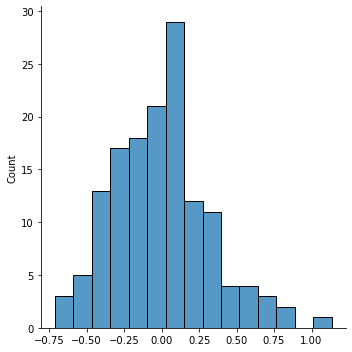

In [181]:
sns.displot(Residual, bins =15)

#### Error term is normally distributed. 

# Making Predictions

In [182]:
df_test[col_list] = scaler.transform(df_test[col_list])

In [183]:
y_test = df_test.pop('price')
x_test = df_test

In [184]:
final_cols = x6.columns

In [185]:
x_test_model6 = x_test[final_cols]
x_test_model6.head()

,carwidth,enginesize,enginelocation_rear,enginetype_rotor,car_company_bmw,car_company_renault
160,-0.652569,-0.660242,0,0,0,0
186,-0.154030,-0.390836,0,0,0,0
59,0.299187,-0.072447,0,0,0,0
165,-0.833856,-0.660242,0,0,0,0
140,-0.924500,-0.415328,0,0,0,0


In [186]:
x_test_sm = sm.add_constant(x_test_model6)

In [187]:
y_pred = Model_6.predict(x_test_sm)

In [188]:
y_pred.head()

160   -0.678030
186   -0.339498
59     0.006498
165   -0.750148
140   -0.658743
dtype: float64

Text(0, 0.5, 'y_pred')

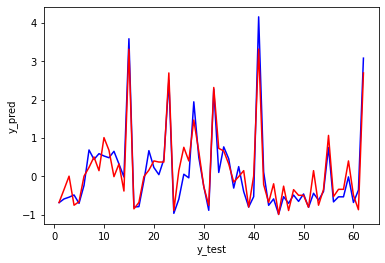

In [189]:
c = [i for i in range(1,63,1)]
plt.plot(c, y_test, color = 'Blue')
plt.plot(c, y_pred, color = 'red')
plt.xlabel('y_test')
plt.ylabel('y_pred')

Text(0, 0.5, 'y_pred')

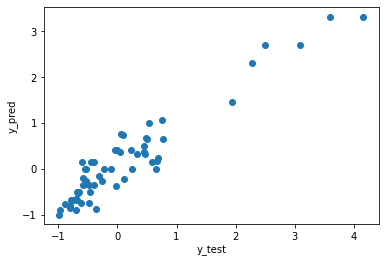

In [190]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

#### Though the model is doing good at the begininng. still there are few high values which model is not able to explain. 

# Evaluation

In [191]:
r_squ = r2_score(y_test, y_pred)
r_squ

0.8997211435182686

So linear equation for price can be given as: price = -0.0748 + 0.3978 * carwidth + 0.5204 * enginesize + enginelocation_rear * 2.0419 + 0.7640 xenginetype_rotor + 1.1294 xcar_company_bmw - 0.5879 * car_company_renault.

## Which variables are significant in predicting the price of car?

enginesize
carwidth
enginetype_rotor
car_company_bmw
enginelocation_rear
car_company_renault (-vely)

These are the variables that are significant in predicting the price of a car.